
Project 1


In [71]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

### Import Dataset

In [5]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics',
'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware','rec.autos',
'rec.motorcycles','rec.sport.baseball',
'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [6]:
twenty_train.target

array([6, 7, 4, ..., 6, 6, 2])

In [7]:
twenty_train.target_names

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']

### (a)		Plot	a	histogram of	the	number	of	training	documents	per	class	to	check	if	they	are	evenly	distributed.

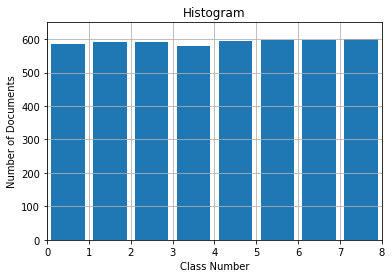

In [8]:
bins=[0,1,2,3,4,5,6,7,8]
plt.hist(twenty_train.target,bins,rwidth=0.8)
plt.xlabel('Class Number')
plt.ylabel('Number of Documents')
plt.title('Histogram')
plt.axis([0, 8, 0, 650])
plt.grid(True)
plt.show()

### (b) Perform the following on the documents of balanced data of 8 classes, to convert them into numerical feature vectors. First tokenize each document into words. Then, excluding the stop words, punctuations, and using stemmed version of words, create a TFxIDF vector representations. 

In [9]:
print type(twenty_train)
print twenty_train.keys()

<class 'sklearn.utils.Bunch'>
['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']


In [10]:
len(twenty_train.data)

4732

In [11]:
len(twenty_test.data)

3150

In [12]:
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print len(combined_stopwords)

410


In [13]:
#The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
# nltk.download()
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print "mapping to Verb, Noun, Adjective, Adverbial"

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent_demo(text): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]
lemmatize_sent_demo('He is walking to school')

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


['he', u'be', u'walk', 'to', 'school']

In [14]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [40]:
count_vect = CountVectorizer(min_df=3,analyzer=stem_rmv_punc)
# count_vect = CountVectorizer(min_df=5,analyzer=stem_rmv_punc)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape # 4732 docs

(4732, 16292)

In [41]:
X_test_counts = count_vect.transform(twenty_test.data)
X_test_counts.shape # 3150 docs

(3150, 16292)

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print X_train_tfidf.shape
print '-' * 20
print X_train_counts.toarray()[500:600,5:15]
print '-' * 20
print X_train_tfidf.toarray()[500:600,5:15]

(4732, 16292)
--------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]

### (c) Find the 10 most significant terms in each of the following classes with respect to TFxICF measure. Note that in this part of your assignment, n_class is 20.

In [401]:
from sklearn.datasets import fetch_20newsgroups
twenty_train1 = fetch_20newsgroups(subset='train', categories=None, shuffle=True, random_state=42)
twenty_test1 = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [402]:
len(twenty_train1.data)

11314

In [403]:
twenty_train1.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [404]:
twenty_set = np.zeros([11314,20])

In [39]:
count_vect1 = CountVectorizer(min_df=3,analyzer=stem_rmv_punc)
# count_vect = CountVectorizer(min_df=5,analyzer=stem_rmv_punc)
X_train_counts1 = count_vect1.fit_transform(twenty_train1.data)
X_train_counts1.shape # 11314 docs

NameError: name 'twenty_train1' is not defined

In [412]:
twenty_set = np.zeros([20,30702])
for targetID in range(0,len(twenty_train1.target)):
    twenty_set[twenty_train1.target[targetID]]+= X_train_counts1[targetID,:]
twenty_set[:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [413]:
terms=np.asarray(count_vect1.get_feature_names())
terms

array([u'0005111312na1em', u'000th', u'0010580b', ..., u'zzzzzz',
       u'\xb3ation', u'\xfd\xe9'],
      dtype='<U80')

In [414]:
X_train_tficf = tfidf_transformer.fit_transform(twenty_set)
print X_train_tficf.shape
print '-' * 20
print twenty_set[1:20,1:10]
print '-' * 20
print np.float_(X_train_tficf.toarray())[1:20,1:10]

(20, 30702)
--------------------
[[  0.   3.   0.   0.   0.   0.   0.   2.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   2.   0.]
 [  2.   0.   5.   4.   0.   4.   6.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   4.]
 [  0.   0.   0.   0.   0.   0.   0.  11.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   3.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]
--------------------
[[  0.00000000e+00   3.03253773e-

In [416]:
terms_T=np.transpose(terms)
strs = ["" for x in range(10)]
padding = np.arange(30702)
for i in 3,4,6,15:
    ty_set_pad = np.vstack([X_train_tficf.toarray()[i,:],padding])
    sig_imp_10 = sorted(np.transpose(ty_set_pad),key=lambda x:x[0],reverse=True)
    for n in range(10):
        numm = sig_imp_10[n][1]
        strs[n] = terms_T[np.int_(numm)]
    strs_T = np.transpose(np.vstack([strs,padding[0:10]]))
    print twenty_train1.target_names[i]+' has the following 10 most significant terms:' 
    print strs_T

comp.sys.ibm.pc.hardware has the following 10 most significant terms:
[[u'scsi' u'0']
 [u'drive' u'1']
 [u'edu' u'2']
 [u'ide' u'3']
 [u'line' u'4']
 [u'use' u'5']
 [u'com' u'6']
 [u'subject' u'7']
 [u'organization' u'8']
 [u'controller' u'9']]
comp.sys.mac.hardware has the following 10 most significant terms:
[[u'edu' u'0']
 [u'line' u'1']
 [u'mac' u'2']
 [u'subject' u'3']
 [u'organization' u'4']
 [u'apple' u'5']
 [u'use' u'6']
 [u'quadra' u'7']
 [u'scsi' u'8']
 [u'problem' u'9']]
misc.forsale has the following 10 most significant terms:
[[u'edu' u'0']
 [u'line' u'1']
 [u'sale' u'2']
 [u'subject' u'3']
 [u'organization' u'4']
 [u'new' u'5']
 [u'post' u'6']
 [u'com' u'7']
 [u'university' u'8']
 [u'offer' u'9']]
soc.religion.christian has the following 10 most significant terms:
[[u'god' u'0']
 [u'edu' u'1']
 [u'christian' u'2']
 [u'jesus' u'3']
 [u'say' u'4']
 [u'church' u'5']
 [u'subject' u'6']
 [u'people' u'7']
 [u'line' u'8']
 [u'know' u'9']]


In [215]:
np.hstack([np.transpose(twenty_set[0]),np.transpose(terms)])

array([u'0.0', u'0.0', u'0.0', ..., u'zzzzzz', u'\xb3ation', u'\xfd\xe9'],
      dtype='<U80')

In [217]:
for i in 3,4,6,15:
    sig_terms = np.transpose(np.vstack([twenty_set[i],np.transpose(terms)]))
    twenty_train1.target_names
    sig10 = sorted(sig_terms,key=lambda x:x[0],reverse=True)
    new_sig10=np.vstack(sig10)
    print twenty_train1.target_names[i]+' has the following 10 most significant terms:'
    print new_sig10[0:10,:]

comp.sys.ibm.pc.hardware has the following 10 most significant terms:
[[u'997.0' u'drive']
 [u'98.0' u'adaptec']
 [u'98.0' u'eisa']
 [u'95.0' u'boot']
 [u'95.0' u'c']
 [u'94.0' u'number']
 [u'94.0' u'usa']
 [u'93.0' u'hd']
 [u'920.0' u'edu']
 [u'92.0' u'slave']]
comp.sys.mac.hardware has the following 10 most significant terms:
[[u'99.0' u'look']
 [u'99.0' u'number']
 [u'99.0' u'vram']
 [u'98.0' u'way']
 [u'97.0' u'mail']
 [u'95.0' u'info']
 [u'94.0' u'cpu']
 [u'93.0' u'ac']
 [u'92.0' u'clock']
 [u'92.0' u'port']]
misc.forsale has the following 10 most significant terms:
[[u'97.0' u'forsale']
 [u'97.0' u'original']
 [u'96.0' u'old']
 [u'94.0' u'appear']
 [u'93.0' u'ohio']
 [u'92.0' u'package']
 [u'91.0' u'box']
 [u'90.0' u'power']
 [u'9.0' u'2mb']
 [u'9.0' u'advertising']]
soc.religion.christian has the following 10 most significant terms:
[[u'99.0' u'hand']
 [u'99.0' u'help']
 [u'99.0' u'marry']
 [u'96.0' u'arrogance']
 [u'96.0' u'clear']
 [u'96.0' u'probably']
 [u'95.0' u'experience'

#### d) Apply LSI to the TFxIDF matrix corresponding to the 8 classes. and pick k=50; so each document is mapped to a 50-dimensional vector. Alternatively, reduce dimensionality through Non-Negative Matrix Factorization (NMF) and compare the results of the parts e-i using both methods.

### LSI

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=5, random_state=42)
X_train_lsi=svd.fit_transform(X_train_tfidf)
X_train_lsi

array([[ 0.12727739,  0.10087277,  0.02831868, ..., -0.00153826,
        -0.04095367,  0.00891065],
       [ 0.12633974,  0.12898094,  0.03774992, ...,  0.1491302 ,
         0.28068439,  0.0533624 ],
       [ 0.1770882 , -0.02824277,  0.0002872 , ...,  0.01672192,
        -0.02992802,  0.01647884],
       ..., 
       [ 0.13645309,  0.11315775,  0.0277115 , ...,  0.0260539 ,
         0.03039151, -0.02383439],
       [ 0.20046062,  0.15859621,  0.03016406, ...,  0.03259629,
         0.01178131,  0.01282113],
       [ 0.12063002, -0.02342554, -0.04576324, ...,  0.03987772,
        -0.00619211,  0.01265135]])

### NMF

In [44]:
X_train_lsi.shape

(4732, 50)

In [45]:
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
X_train_nmf = model.fit_transform(X_train_tfidf)
X_train_nmf

array([[ 0.08328405,  0.02441659,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01062915,  0.        ,  0.03132605, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.01868059,  0.05391546,  0.        , ...,  0.        ,
         0.        ,  0.00025616],
       [ 0.14854722,  0.0623291 ,  0.00076439, ...,  0.00108973,
         0.        ,  0.00125722],
       [ 0.        ,  0.        ,  0.00807991, ...,  0.        ,
         0.        ,  0.00222103]])

In [46]:
X_train_nmf.shape

(4732, 50)

### Reduce 8 classes to 2 classes

In [47]:
twenty_train.target_names

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']

In [48]:
target2_names=['Computer technology','Recreational activity']
target2=np.zeros([4732,1])
for i in range(0,len(twenty_train.target)):
    if twenty_train.target[i]<=3:
        target2[i]=0
    else:
        target2[i]=1
target2=np.int_(target2)
target2.shape

(4732, 1)

In [49]:
target2_test=np.zeros([3150,1])
for i in range(0,len(twenty_test.target)):
    if twenty_test.target[i]<=3:
        target2_test[i]=0
    else:
        target2_test[i]=1
target2_test=np.int_(target2_test)
target2_test

array([[0],
       [0],
       [0],
       ..., 
       [1],
       [0],
       [0]])

In [50]:
target2

array([[1],
       [1],
       [1],
       ..., 
       [1],
       [1],
       [0]])

### Functions for fit model and plot roc

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    fig.show()

In [64]:
from __future__ import division
def confusion_matrix_const(predicted_prob,test_label):
    tp=0
    tn=0
    fp=0
    fn=0
    predicted_label=np.zeros([3150,1])
    for i in range(0,len(predicted_prob)):
        if predicted_prob[i][0]<predicted_prob[i][1]:
            predicted_label[i]=1
        predicted_label=np.int_(predicted_label)  
    for i in range (0, len(predicted_label)):
        if test_label[i]==1:
            if predicted_label[i]==1: tp+=1
            else:fn+=1
        else:
            if predicted_label[i]==1: fp+=1
            else:tn+=1
    print 'tp '+str(tp)
    print 'tn '+str(tn)
    print 'fp '+str(fp)
    print 'fn '+str(fn)
    print 'recall:'+str(tp/(tp+fn))
    print 'accuracy:'+str((tp+tn)/(tp+fn+fp+tn))
    print 'precision:'+str(tp/(fp+tp))

In [65]:
def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)
    prob_value = pipe.predict(test_data)
    
    confusion_matrix_const(prob_score,test_label)
    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])
    plot_roc(fpr, tpr)
    return pipe

In [66]:
def fit_predict_and_plot_roc2(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)
    prob_score = pipe.predict_proba(test_data)
    prob_value = pipe.predict(test_data)
    con_matri=confusion_matrix(test_label, prob_value)
    print con_matri
    print 'recall:'+str(recall_score(test_label,prob_value))
    print 'accuracy:'+str(accuracy_score(test_label,prob_value))
    print 'precision:'+str(precision_score(test_label,prob_value))
    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])
    plot_roc(fpr, tpr)
    return pipe

## e) SVM classifier

### Soft Margin SVM: gamma=0.001

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=0.001,kernel='linear',probability=True)),
])
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=0.001,kernel='linear',probability=True)),
])
pipeline3 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=0.001,kernel='linear',probability=True)),
])
pipeline4 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=0.001,kernel='linear',probability=True)),
])

#### MIN_DF=3, NMF

tp 1161
tn 1538
fp 22
fn 429


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

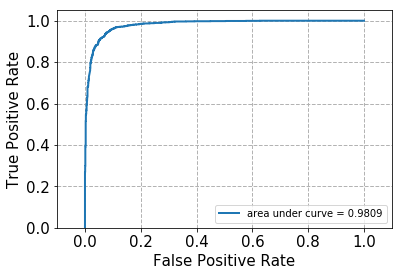

In [354]:
fit_predict_and_plot_roc(pipeline1, twenty_train.data, target2, twenty_test.data, target2_test)

#### MIN_DF=3, LSI

tp 1218
tn 1554
fp 6
fn 372
recall:0.766037735849
accuracy:0.88
precision:0.995098039216


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

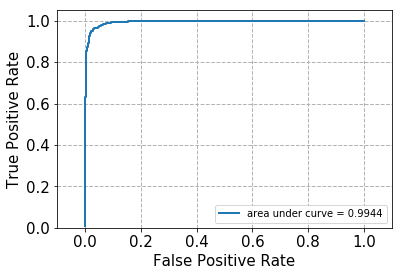

In [361]:
fit_predict_and_plot_roc(pipeline2, twenty_train.data, target2, twenty_test.data, target2_test)

#### MIN_DF=5, NMF

tp 1420
tn 1474
fp 86
fn 170
recall:0.893081761006
accuracy:0.91873015873
precision:0.942895086321


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

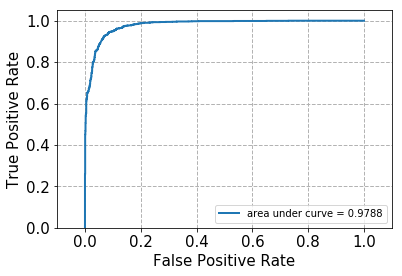

In [366]:
fit_predict_and_plot_roc(pipeline3, twenty_train.data, target2, twenty_test.data, target2_test)

#### MIN_DF=5, LSI

tp 1319
tn 1552
fp 8
fn 271
recall:0.829559748428
accuracy:0.911428571429
precision:0.993971363979


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

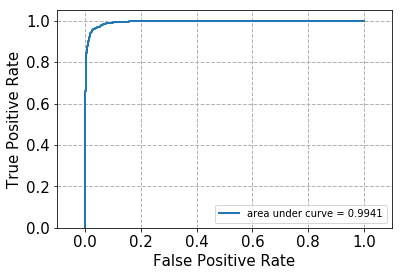

In [367]:
fit_predict_and_plot_roc(pipeline4, twenty_train.data, target2, twenty_test.data, target2_test)

### Hard Margin SVM: gamma=1000

In [368]:
pipeline5 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=1000,kernel='linear',probability=True)),
])
pipeline6 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=1000,kernel='linear',probability=True)),
])
pipeline7 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=1000,kernel='linear',probability=True)),
])
pipeline8 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=1000,kernel='linear',probability=True)),
])

#### MIN_DF=3, NMF

tp 1538
tn 1490
fp 70
fn 52
recall:0.967295597484
accuracy:0.96126984127
precision:0.956467661692


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

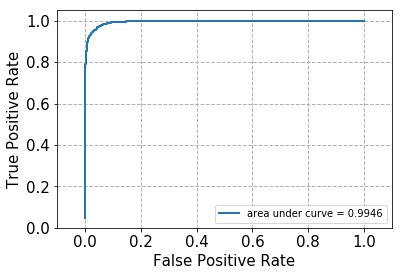

In [369]:
fit_predict_and_plot_roc(pipeline5, twenty_train.data, target2, twenty_test.data, target2_test)

#### MIN_DF=3, LSI

tp 1557
tn 1503
fp 57
fn 33
recall:0.979245283019
accuracy:0.971428571429
precision:0.96468401487


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

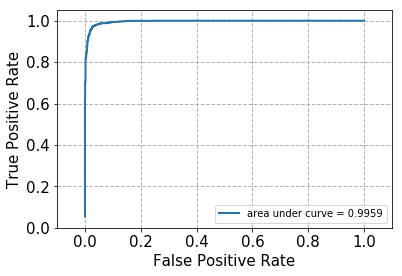

In [370]:
fit_predict_and_plot_roc(pipeline6, twenty_train.data, target2, twenty_test.data, target2_test)

#### MIN_DF=5, NMF

tp 1538
tn 1492
fp 68
fn 52
recall:0.967295597484
accuracy:0.961904761905
precision:0.957658779577


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

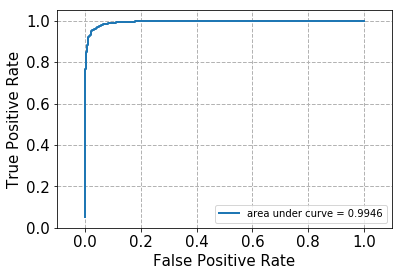

In [371]:
fit_predict_and_plot_roc(pipeline7, twenty_train.data, target2, twenty_test.data, target2_test)

#### MIN_DF=5, LSI

tp 1560
tn 1497
fp 63
fn 30
recall:0.981132075472
accuracy:0.970476190476
precision:0.961182994455


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

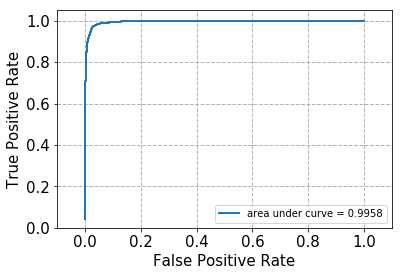

In [372]:
fit_predict_and_plot_roc(pipeline8, twenty_train.data, target2, twenty_test.data, target2_test)

### f) 5-fold cross-validation

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
scores_list=[]
for k in range(-3,4):
    param=10**k
    clf = SVC(C=param,kernel='linear',probability=True)
    scores = cross_val_score(clf, X_train_lsi, target2, cv=5, scoring='accuracy')
    scores_list.append(scores.mean())
scores_list

[0.50486057216933178,
 0.50507176541114807,
 0.96893448737067511,
 0.97231558989521716,
 0.9746416196778418,
 0.9742192341391771,
 0.97443087435081743]

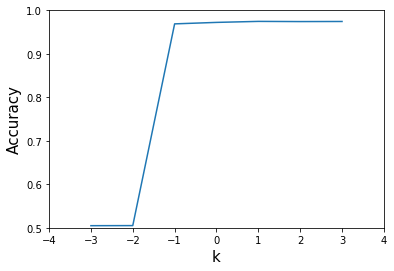

In [56]:
k=[-3,-2,-1,0,1,2,3]
plt.plot(k, scores_list)
plt.axis([-4, 4, 0.5, 1])
plt.xlabel('k',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.show()

In [396]:
pipeline55 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=10,kernel='linear',probability=True)),
])
pipeline66 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=10,kernel='linear',probability=True)),
])
pipeline77 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=10,kernel='linear',probability=True)),
])
pipeline88 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=10,kernel='linear',probability=True)),
])

tp 1519
tn 1473
fp 87
fn 71
recall:0.95534591195
accuracy:0.949841269841
precision:0.945828144458


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

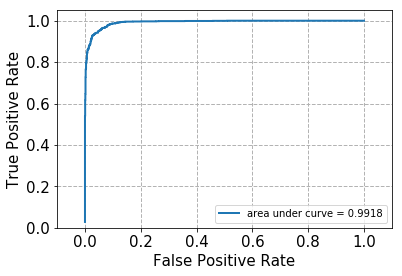

In [397]:
fit_predict_and_plot_roc(pipeline55, twenty_train.data, target2, twenty_test.data, target2_test)

tp 1562
tn 1508
fp 52
fn 28
recall:0.982389937107
accuracy:0.974603174603
precision:0.967781908302


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

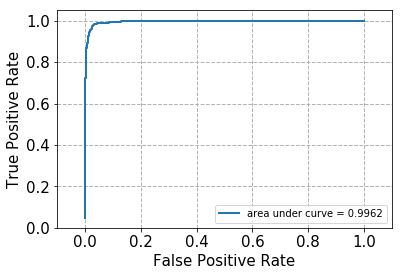

In [398]:
fit_predict_and_plot_roc(pipeline66, twenty_train.data, target2, twenty_test.data, target2_test)

tp 1530
tn 1485
fp 75
fn 60
recall:0.962264150943
accuracy:0.957142857143
precision:0.953271028037


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

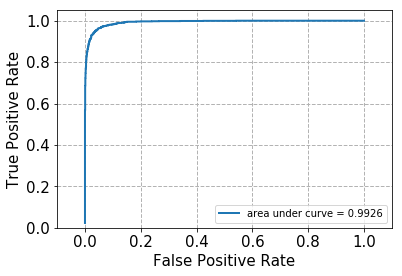

In [399]:
fit_predict_and_plot_roc(pipeline77, twenty_train.data, target2, twenty_test.data, target2_test)

tp 1560
tn 1505
fp 55
fn 30
recall:0.981132075472
accuracy:0.973015873016
precision:0.965944272446


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

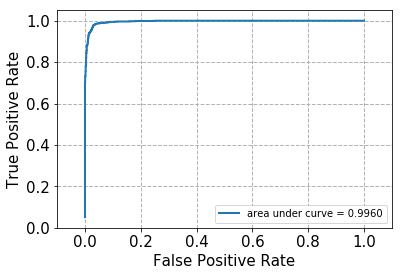

In [400]:
fit_predict_and_plot_roc(pipeline88, twenty_train.data, target2, twenty_test.data, target2_test)

 #### Naive Bayes Classifier
 

In [373]:
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, TransformerMixin

class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self
pipeline9 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('toarray',SparseToDenseArray()),
    ('clf',GaussianNB()),
])
pipeline10 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('toarray',SparseToDenseArray()),
    ('clf',GaussianNB()),
])
pipeline11 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('toarray',SparseToDenseArray()),
    ('clf',GaussianNB()),
])
pipeline12 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('toarray',SparseToDenseArray()),
    ('clf',GaussianNB()),
])

tp 1513
tn 1462
fp 98
fn 77
recall:0.951572327044
accuracy:0.944444444444
precision:0.939168218498


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...='cd', tol=0.0001, verbose=0)), ('toarray', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

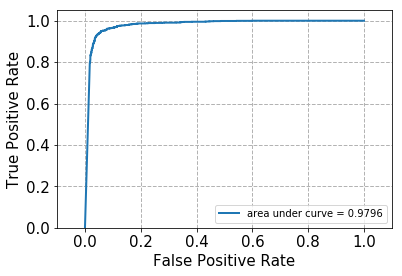

In [374]:
fit_predict_and_plot_roc(pipeline9, twenty_train.data, target2, twenty_test.data, target2_test)

[[1462   98]
 [  77 1513]]
0.951572327044
0.944444444444
0.939168218498


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...='cd', tol=0.0001, verbose=0)), ('toarray', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

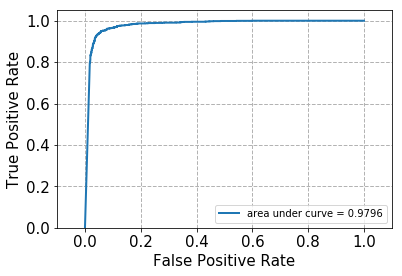

In [382]:
fit_predict_and_plot_roc2(pipeline9, twenty_train.data, target2, twenty_test.data, target2_test)

[[1334  226]
 [  56 1534]]
0.964779874214
0.910476190476
0.871590909091


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...    random_state=42, tol=0.0)), ('toarray', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

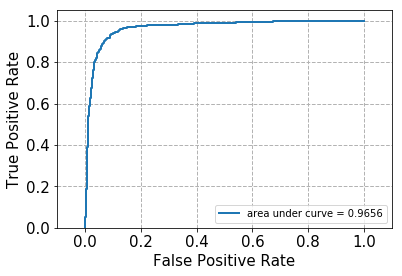

In [384]:
fit_predict_and_plot_roc2(pipeline10, twenty_train.data, target2, twenty_test.data, target2_test)

[[1431  129]
 [  73 1517]]
0.954088050314
0.935873015873
0.92162818955


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...='cd', tol=0.0001, verbose=0)), ('toarray', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

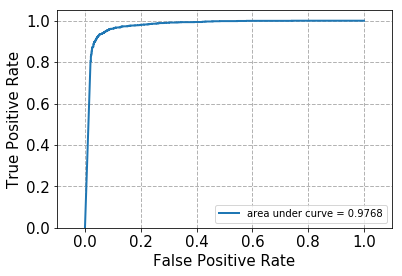

In [385]:
fit_predict_and_plot_roc2(pipeline11, twenty_train.data, target2, twenty_test.data, target2_test)

[[1307  253]
 [  95 1495]]
0.940251572327
0.889523809524
0.855263157895


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...    random_state=42, tol=0.0)), ('toarray', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

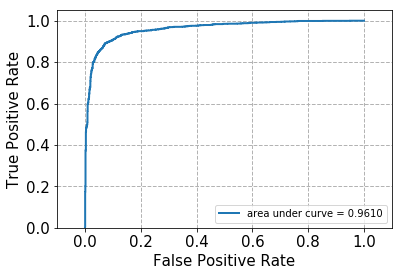

In [386]:
fit_predict_and_plot_roc2(pipeline12, twenty_train.data, target2, twenty_test.data, target2_test)

#### Multinomial naïve Bayes classifier

In [393]:
from sklearn.naive_bayes import MultinomialNB

pipeline13 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',MultinomialNB()),
])
pipeline14 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    #('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',MultinomialNB()),
])
pipeline15 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',MultinomialNB()),
])
pipeline16 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    #('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',MultinomialNB()),
])

[[1414  146]
 [  43 1547]]
recall:0.972955974843
accuracy:0.94
precision:0.913762551683


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...='cd', tol=0.0001, verbose=0)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

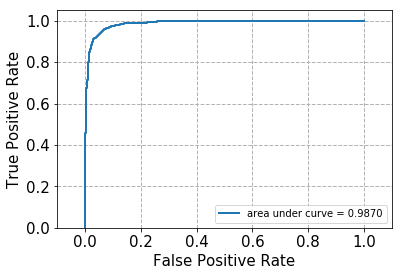

In [389]:
fit_predict_and_plot_roc2(pipeline13, twenty_train.data, target2, twenty_test.data, target2_test)

[[1529   31]
 [  19 1571]]
recall:0.988050314465
accuracy:0.984126984127
precision:0.980649188514


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...False,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

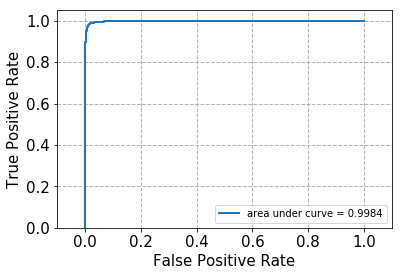

In [394]:
fit_predict_and_plot_roc2(pipeline14, twenty_train.data, target2, twenty_test.data, target2_test)

[[1415  145]
 [  35 1555]]
recall:0.977987421384
accuracy:0.942857142857
precision:0.914705882353


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...='cd', tol=0.0001, verbose=0)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

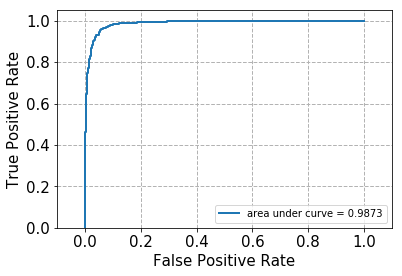

In [392]:
fit_predict_and_plot_roc2(pipeline15, twenty_train.data, target2, twenty_test.data, target2_test)

[[1529   31]
 [  27 1563]]
recall:0.983018867925
accuracy:0.981587301587
precision:0.980552070263


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a1302f2a8>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...False,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

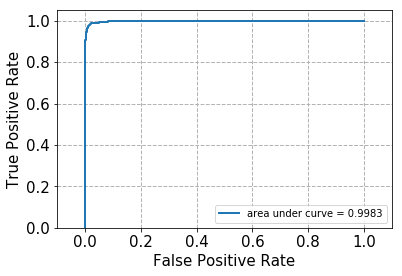

In [395]:
fit_predict_and_plot_roc2(pipeline16, twenty_train.data, target2, twenty_test.data, target2_test)

#### LRC

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline17 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',LogisticRegression()),
])
pipeline18 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',LogisticRegression()),
])
pipeline19 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',LogisticRegression()),
])
pipeline20 = Pipeline([
    ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',LogisticRegression()),
])

[[1447  113]
 [  80 1510]]
recall:0.949685534591
accuracy:0.93873015873
precision:0.930375847197


/Users/apple/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a0c8e76e0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

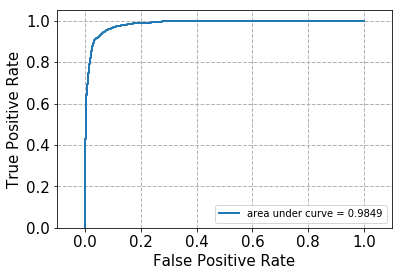

In [67]:
fit_predict_and_plot_roc2(pipeline17, twenty_train.data, target2, twenty_test.data, target2_test)

[[1486   74]
 [  34 1556]]
recall:0.978616352201
accuracy:0.965714285714
precision:0.954601226994


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a0c8e76e0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

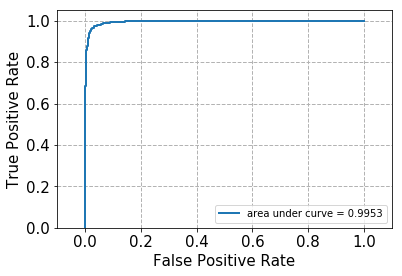

In [68]:
fit_predict_and_plot_roc2(pipeline18, twenty_train.data, target2, twenty_test.data, target2_test)

[[1456  104]
 [  71 1519]]
recall:0.95534591195
accuracy:0.944444444444
precision:0.935921133703


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a0c8e76e0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

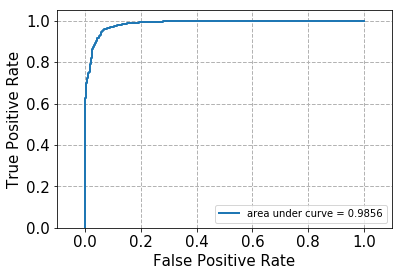

In [69]:
fit_predict_and_plot_roc2(pipeline19, twenty_train.data, target2, twenty_test.data, target2_test)

[[1486   74]
 [  32 1558]]
recall:0.979874213836
accuracy:0.966349206349
precision:0.954656862745


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a0c8e76e0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

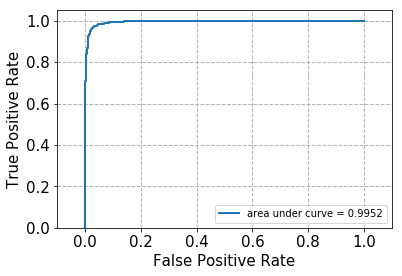

In [70]:
fit_predict_and_plot_roc2(pipeline20, twenty_train.data, target2, twenty_test.data, target2_test)

In [98]:
def fit_predict_by_lanlan(train_lsi,test_lsi,test_label):
    clf.fit(train_lsi, target2)
    predicted3 = clf.predict(test_lsi)
    
    prob_value = predicted3
    con_matri=confusion_matrix(test_label, prob_value)
    accuracy=accuracy_score(test_label,prob_value)
    print con_matri
    print 'recall:'+str(recall_score(test_label,prob_value))
    print 'accuracy:'+str(accuracy)
    print 'precision:'+str(precision_score(test_label,prob_value))
    print '-----------------------------------------------------'
    return accuracy

In [96]:
def draw_roc(train_lsi,test_lsi,test_label,order,penalty):
    clf = LogisticRegression(C = 10**order, penalty = penalty)
    clf.fit(train_lsi, target2)
    predicted3 = clf.predict(test_lsi)
    prob_value = predicted3
    prob_score = clf.predict_proba(test_lsi)
    fpr, tpr, _ = roc_curve(target2_test, prob_score[:,1])
    plot_roc(fpr, tpr)

In [88]:
count_vect3 = CountVectorizer(min_df=3,analyzer=stem_rmv_punc)

count_vect5 = CountVectorizer(min_df=5,analyzer=stem_rmv_punc)

X_train_counts3 = count_vect3.fit_transform(twenty_train.data)
X_test_counts3  = count_vect3.transform(twenty_test.data)
X_train_counts5 = count_vect5.fit_transform(twenty_train.data)
X_test_counts5  = count_vect5.transform(twenty_test.data)

tfidf_transformer = TfidfTransformer()

X_train_tfidf3 = tfidf_transformer.fit_transform(X_train_counts3)
X_test_tfidf3   = tfidf_transformer.fit_transform(X_test_counts3)
X_train_tfidf5 = tfidf_transformer.fit_transform(X_train_counts5)
X_test_tfidf5   = tfidf_transformer.fit_transform(X_test_counts5)


svd = TruncatedSVD(n_components=50, n_iter=5, random_state=42)


In [89]:
#lsi
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
X_train_lsi3=svd.fit_transform(X_train_tfidf3)
X_test_lsi3=svd.transform(X_test_tfidf3)

X_train_lsi5=svd.fit_transform(X_train_tfidf5)
X_test_lsi5=svd.transform(X_test_tfidf5)


In [104]:
def plot_accuracy(accur,low_bound):
    k=[-3,-2,-1,0,1,2,3]
    plt.plot(k, accur)
    plt.axis([-4, 4, low_bound, 1])
    plt.xlabel('k',fontsize=15)
    plt.ylabel('Accuracy',fontsize=15)
    plt.show()

[[1560    0]
 [1590    0]]
recall:0.0
accuracy:0.495238095238
precision:0.0
-----------------------------------------------------
[[1465   95]
 [ 264 1326]]
recall:0.833962264151
accuracy:0.886031746032
precision:0.933145672062
-----------------------------------------------------
[[1478   82]
 [  52 1538]]
recall:0.967295597484
accuracy:0.95746031746
precision:0.949382716049
-----------------------------------------------------
[[1487   73]
 [  39 1551]]
recall:0.975471698113
accuracy:0.964444444444
precision:0.955049261084
-----------------------------------------------------
[[1500   60]
 [  32 1558]]
recall:0.979874213836
accuracy:0.970793650794
precision:0.962917181706
-----------------------------------------------------
[[1502   58]
 [  31 1559]]
recall:0.980503144654
accuracy:0.971746031746
precision:0.964131106988
-----------------------------------------------------
[[1502   58]
 [  33 1557]]
recall:0.979245283019
accuracy:0.971111111111
precision:0.964086687307
-------------

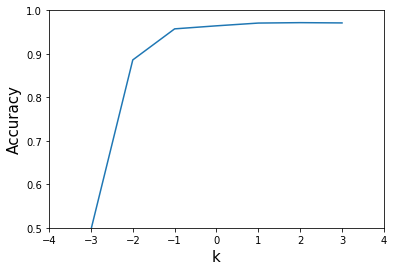

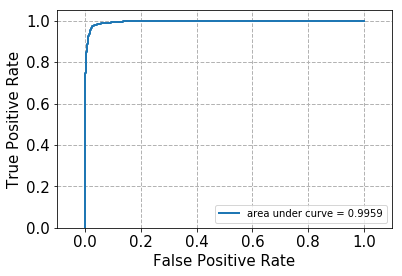

In [105]:
# min = 3, penalty = l1; As C increases the error decreases
accur=[]
for i in range(-3,4):
    clf = LogisticRegression(C = 10**i, penalty = 'l1')
    accur_tmp=fit_predict_by_lanlan(X_train_lsi3,X_test_lsi3,target2_test)
    accur.append(accur_tmp)
plot_accuracy(accur,0.5)
draw_roc(X_train_lsi3,X_test_lsi3,target2_test,2,'l1')

[[ 633  927]
 [   0 1590]]
recall:1.0
accuracy:0.705714285714
precision:0.631704410012
-----------------------------------------------------
[[1389  171]
 [  12 1578]]
recall:0.992452830189
accuracy:0.941904761905
precision:0.902229845626
-----------------------------------------------------
[[1471   89]
 [  39 1551]]
recall:0.975471698113
accuracy:0.959365079365
precision:0.945731707317
-----------------------------------------------------
[[1483   77]
 [  34 1556]]
recall:0.978616352201
accuracy:0.964761904762
precision:0.952847519902
-----------------------------------------------------
[[1500   60]
 [  28 1562]]
recall:0.982389937107
accuracy:0.972063492063
precision:0.963008631319
-----------------------------------------------------
[[1505   55]
 [  32 1558]]
recall:0.979874213836
accuracy:0.972380952381
precision:0.965902045877
-----------------------------------------------------
[[1503   57]
 [  30 1560]]
recall:0.981132075472
accuracy:0.972380952381
precision:0.964749536178
-

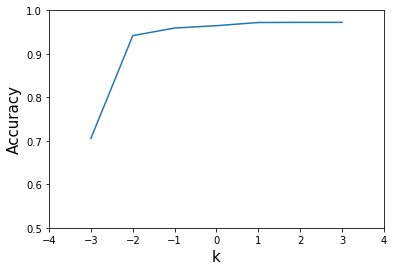

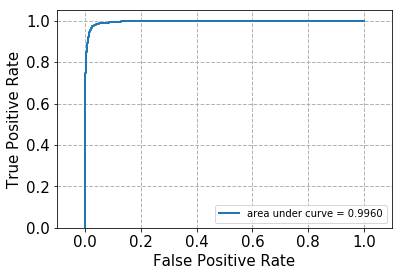

In [109]:
# min = 3, penalty = l2; As C increases the error decreases
accur=[]
for i in range(-3,4):
    clf = LogisticRegression(C = 10**i, penalty = 'l2')
    accur_tmp=fit_predict_by_lanlan(X_train_lsi3,X_test_lsi3,target2_test)
    accur.append(accur_tmp)
plot_accuracy(accur,0.5)
draw_roc(X_train_lsi3,X_test_lsi3,target2_test,2,'l2')

[[1560    0]
 [1590    0]]
recall:0.0
accuracy:0.495238095238
precision:0.0
-----------------------------------------------------
[[1462   98]
 [ 252 1338]]
recall:0.841509433962
accuracy:0.888888888889
precision:0.931754874652
-----------------------------------------------------
[[1476   84]
 [  57 1533]]
recall:0.964150943396
accuracy:0.955238095238
precision:0.948051948052
-----------------------------------------------------
[[1485   75]
 [  40 1550]]
recall:0.974842767296
accuracy:0.963492063492
precision:0.953846153846
-----------------------------------------------------
[[1500   60]
 [  32 1558]]
recall:0.979874213836
accuracy:0.970793650794
precision:0.962917181706
-----------------------------------------------------
[[1500   60]
 [  34 1556]]
recall:0.978616352201
accuracy:0.970158730159
precision:0.962871287129
-----------------------------------------------------
[[1500   60]
 [  34 1556]]
recall:0.978616352201
accuracy:0.970158730159
precision:0.962871287129
------------

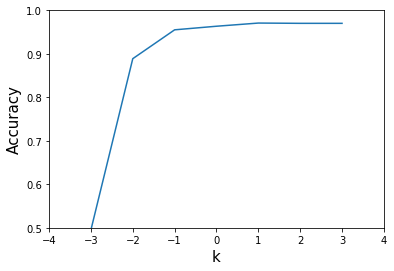

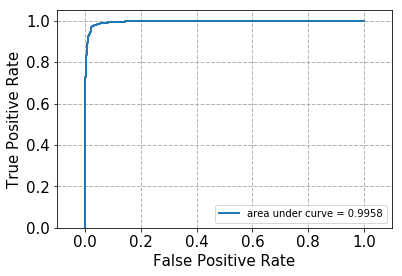

In [111]:
# min = 5, penalty = l1; As C increases the error decreases
accur=[]
for i in range(-3,4):
    clf = LogisticRegression(C = 10**i,penalty = 'l1')
    accur_tmp=fit_predict_by_lanlan(X_train_lsi5,X_test_lsi5,target2_test)
    accur.append(accur_tmp)
plot_accuracy(accur,0.5)
draw_roc(X_train_lsi5,X_test_lsi5,target2_test,1,'l1')

[[ 726  834]
 [   1 1589]]
recall:0.999371069182
accuracy:0.734920634921
precision:0.655798596781
-----------------------------------------------------
[[1396  164]
 [  12 1578]]
recall:0.992452830189
accuracy:0.944126984127
precision:0.905855338691
-----------------------------------------------------
[[1470   90]
 [  36 1554]]
recall:0.977358490566
accuracy:0.96
precision:0.945255474453
-----------------------------------------------------
[[1482   78]
 [  32 1558]]
recall:0.979874213836
accuracy:0.965079365079
precision:0.952322738386
-----------------------------------------------------
[[1502   58]
 [  27 1563]]
recall:0.983018867925
accuracy:0.973015873016
precision:0.96421961752
-----------------------------------------------------
[[1505   55]
 [  31 1559]]
recall:0.980503144654
accuracy:0.972698412698
precision:0.965923172243
-----------------------------------------------------
[[1501   59]
 [  34 1556]]
recall:0.978616352201
accuracy:0.970476190476
precision:0.96346749226
--

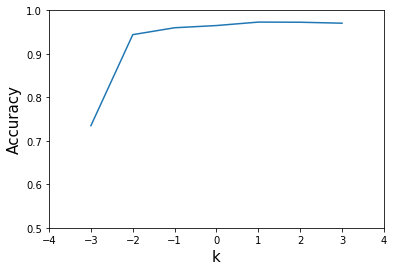

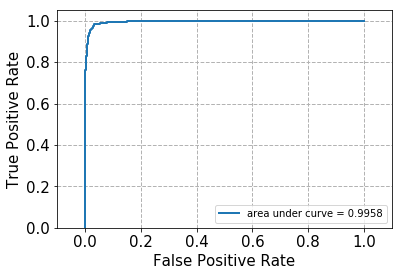

In [112]:
# min = 5, penalty = l2; As C increases the error decreases
accur=[]
for i in range(-3,4):
    clf = LogisticRegression(C = 10**i, penalty = 'l2')
    accur_tmp=fit_predict_by_lanlan(X_train_lsi5,X_test_lsi5,target2_test)
    accur.append(accur_tmp)
plot_accuracy(accur,0.5)
draw_roc(X_train_lsi5,X_test_lsi5,target2_test,1,'l2')

In [113]:
#nmf model
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
nmf3 = NMF(n_components=50, init='random', random_state=0)
X_train_nmf3=nmf3.fit_transform(X_train_tfidf3)
X_test_nmf3=nmf3.transform(X_test_tfidf3)

[[   0 1560]
 [   0 1590]]
recall:1.0
accuracy:0.504761904762
precision:0.504761904762
-----------------------------------------------------
[[ 104 1456]
 [   0 1590]]
recall:1.0
accuracy:0.537777777778
precision:0.521996060407
-----------------------------------------------------
[[1349  211]
 [  47 1543]]
recall:0.970440251572
accuracy:0.918095238095
precision:0.879703534778
-----------------------------------------------------
[[1444  116]
 [  78 1512]]
recall:0.950943396226
accuracy:0.938412698413
precision:0.928746928747
-----------------------------------------------------
[[1463   97]
 [  70 1520]]
recall:0.955974842767
accuracy:0.946984126984
precision:0.940012368584
-----------------------------------------------------
[[1472   88]
 [  56 1534]]
recall:0.964779874214
accuracy:0.954285714286
precision:0.945745992602
-----------------------------------------------------
[[1480   80]
 [  48 1542]]
recall:0.969811320755
accuracy:0.959365079365
precision:0.950678175092
------------

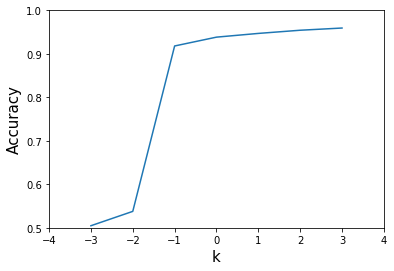

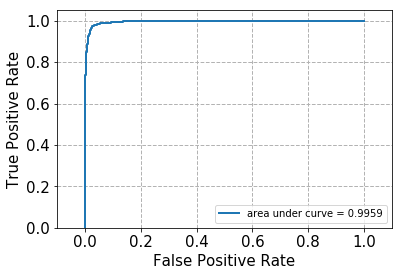

In [114]:
# min = 3, penalty = l2; As C increases the error decreases
accur=[]
for i in range(-3,4):
    clf = LogisticRegression(C = 10**i, penalty = 'l2')
    accur_tmp=fit_predict_by_lanlan(X_train_nmf3,X_test_nmf3,target2_test)
    accur.append(accur_tmp)
plot_accuracy(accur,0.5)
draw_roc(X_train_lsi3,X_test_lsi3,target2_test,3,'l2')

[[1560    0]
 [1590    0]]
recall:0.0
accuracy:0.495238095238
precision:0.0
-----------------------------------------------------
[[1465   95]
 [ 264 1326]]
recall:0.833962264151
accuracy:0.886031746032
precision:0.933145672062
-----------------------------------------------------
[[1478   82]
 [  52 1538]]
recall:0.967295597484
accuracy:0.95746031746
precision:0.949382716049
-----------------------------------------------------
[[1487   73]
 [  39 1551]]
recall:0.975471698113
accuracy:0.964444444444
precision:0.955049261084
-----------------------------------------------------
[[1500   60]
 [  32 1558]]
recall:0.979874213836
accuracy:0.970793650794
precision:0.962917181706
-----------------------------------------------------
[[1502   58]
 [  31 1559]]
recall:0.980503144654
accuracy:0.971746031746
precision:0.964131106988
-----------------------------------------------------
[[1502   58]
 [  33 1557]]
recall:0.979245283019
accuracy:0.971111111111
precision:0.964086687307
-------------

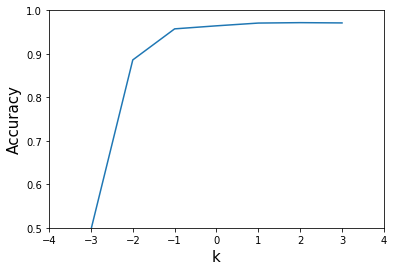

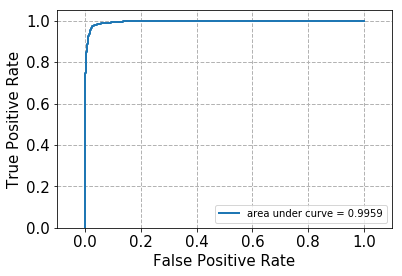

In [115]:
# min = 3, penalty = l1; As C increases the error decreases
accur=[]
for i in range(-3,4):
    clf = LogisticRegression(C = 10**i, penalty = 'l1')
    accur_tmp=fit_predict_by_lanlan(X_train_lsi3,X_test_lsi3,target2_test)
    accur.append(accur_tmp)
plot_accuracy(accur,0.5)
draw_roc(X_train_lsi3,X_test_lsi3,target2_test,2,'l1')

#### part i: multiclass clasification for Naive Bayes

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin

class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

In [118]:
categories = [
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware',
'misc.forsale','soc.religion.christian']

In [119]:
from sklearn.datasets import fetch_20newsgroups
twenty_trainl = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_testl = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [120]:
from sklearn.pipeline import Pipeline
pipelineA = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',MultinomialNB()),
])
pipelineB = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('clf',MultinomialNB()),
])


In [121]:
target4_names=['comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'misc.forsale',
 'soc.religion.christian']
target4=np.zeros([2352,1])
for i in range(0,len(twenty_trainl.target)): 
     target4[i]=twenty_trainl.target[i]
target4=np.int_(target4)
target4.shape


(2352, 1)

In [122]:
target4_test=np.zeros([len(twenty_testl.target),1])
for n in range(0,len(twenty_testl.target)):
        target4_test[n]=twenty_testl.target[n]
target4_test=np.int_(target4_test)
target4_test.shape

(1565, 1)

In [123]:
def fit_predict_3(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)
    prob_score = pipe.predict_proba(test_data)
    prob_value = pipe.predict(test_data)
    con_matri=confusion_matrix(test_label, prob_value)
    print con_matri
    print 'recall:'+str(recall_score(test_label,prob_value,average='weighted'))
    print 'accuracy:'+str(accuracy_score(test_label,prob_value))
    print 'precision:'+str(precision_score(test_label,prob_value,average='weighted'))
    return pipe
   

In [124]:
fit_predict_3(pipelineA, twenty_trainl.data, target4, twenty_testl.data, target4_test)

[[317  41  29   5]
 [111 234  38   2]
 [ 35   9 342   4]
 [  4   0   1 393]]
recall:0.821725239617
accuracy:0.821725239617
precision:0.827979990496


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a0c8e76e0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...='cd', tol=0.0001, verbose=0)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [125]:
fit_predict_3(pipelineB, twenty_trainl.data, target4, twenty_testl.data, target4_test)

[[339  34  19   0]
 [ 28 339  18   0]
 [ 35  20 334   1]
 [  5   1   3 389]]
recall:0.895207667732
accuracy:0.895207667732
precision:0.896505268317


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=<function stem_rmv_punc at 0x1a0c8e76e0>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=...False,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [126]:
twenty_trainl.target_names

['comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'misc.forsale',
 'soc.religion.christian']

#### SVM One vs One and One vs Rest`

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline_0 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=10,kernel='linear',probability=True, class_weight = 'balanced')),
])

pipeline_1 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=10,kernel='linear',probability=True,class_weight = 'balanced')),
])
pipeline_2 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf',SVC(C=10,kernel='linear',probability=True, class_weight = 'balanced', decision_function_shape='ovo')),
])

pipeline_3 = Pipeline([
    ('vect', CountVectorizer(min_df=3,analyzer=stem_rmv_punc)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, n_iter=5, random_state=42)),
    ('clf',SVC(C=10,kernel='linear',probability=True,class_weight = 'balanced',decision_function_shape='ovo')),
])

In [128]:
def fit_predict_mul(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)
    prob_score = pipe.predict_proba(test_data)
    prob_value = pipe.predict(test_data)
    con_matri=confusion_matrix(test_label, prob_value)
    print con_matri
    print 'recall:'+str(recall_score(test_label,prob_value,average = 'weighted'))
    print 'accuracy:'+str(accuracy_score(test_label,prob_value))
    print 'precision:'+str(precision_score(test_label,prob_value, average= 'weighted'))
   

In [129]:
# nmf ovr
fit_predict_mul(pipeline_0,twenty_trainl.data,target4,twenty_testl.data,target4_test) 

[[312  60  20   0]
 [ 93 274  18   0]
 [ 41  25 324   0]
 [ 11   7   3 377]]
recall:0.822364217252
accuracy:0.822364217252
precision:0.830696138609


In [130]:
# lsi ovr
fit_predict_mul(pipeline_1,twenty_trainl.data,target4,twenty_testl.data,target4_test) 

[[323  45  24   0]
 [ 38 323  24   0]
 [ 24  19 345   2]
 [  7   2   2 387]]
recall:0.880511182109
accuracy:0.880511182109
precision:0.881319681877


In [131]:
# nmf ovo
fit_predict_mul(pipeline_2,twenty_trainl.data,target4,twenty_testl.data,target4_test) 

[[312  60  20   0]
 [ 93 274  18   0]
 [ 41  25 324   0]
 [ 11   7   3 377]]
recall:0.822364217252
accuracy:0.822364217252
precision:0.830696138609


In [133]:
# lsi ovo
fit_predict_mul(pipeline_3,twenty_trainl.data,target4,twenty_testl.data,target4_test) 

[[323  45  24   0]
 [ 38 323  24   0]
 [ 24  19 345   2]
 [  7   2   2 387]]
recall:0.880511182109
accuracy:0.880511182109
precision:0.881319681877
